In [1]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates

In [81]:
# connect to google
pytrends = TrendReq(hl='en-US', tz=360)

# basic request // single keyword
kw_list = ["recession"]

In [82]:
# last year of data
pytrends.build_payload(kw_list, 
                        cat=0, 
                        timeframe='today 5-y', 
                        geo='', 
                        gprop=''
                      )

In [83]:
# interest over time
iot = pytrends.interest_over_time()


In [84]:
iot

,recession,isPartial
date,,
2018-09-16,8,False
2018-09-23,8,False
2018-09-30,7,False
2018-10-07,9,False
2018-10-14,9,False
...,...,...
2023-08-06,11,False
2023-08-13,16,False
2023-08-20,13,False


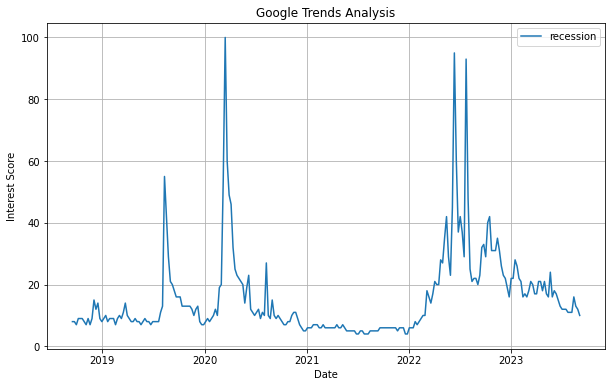

In [30]:
## plotting 
plt.figure(figsize=(10, 6))
for i in kw_list:
    plt.plot(iot.index.values, iot[keyword].values, label=keyword)
plt.title('Google Trends Analysis')
plt.xlabel('Date')
plt.ylabel('Interest Score')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# regional data // resolution=['CITY','COUNTRY','REGION','DMA'][1]
regionData = pytrends.interest_by_region(resolution='COUNTRY', 
                                          inc_low_vol=True, 
                                          inc_geo_code=False
                                        )

In [32]:
# related topics, queries use with single keyword only
relatedTopics = pytrends.related_topics()
relatedTopics.keys()
relatedTopics[kw_list[0]]
relatedTopics[kw_list[0]]['rising']
relatedTopics[kw_list[0]]['rising'].columns
relatedTopics[kw_list[0]]['rising']['topic_title']
relatedTopics[kw_list[0]]['top']
relatedTopics[kw_list[0]]['top'].columns
relatedTopics[kw_list[0]]['top']['topic_title']

0                  Recession
1              United States
2                    Economy
3            Great Recession
4                 Definition
5                      Stock
6                       Gums
7         Gingival recession
8                  Economics
9                     Market
10                 Inflation
11                      Rate
12                      2008
13                  Business
14    Gross domestic product
15                Investment
16     Coronavirus recession
17              Unemployment
18                  Interest
19             Interest rate
20      The Great Depression
21                Government
22                    future
23                succeeding
24      Federal Reserve Bank
Name: topic_title, dtype: object

In [33]:
relatedQueries = pytrends.related_queries()
relatedQueries.keys()
relatedQueries[kw_list[0]]
relatedQueries[kw_list[0]].keys()
relatedQueries[kw_list[0]]['rising']
relatedQueries[kw_list[0]]['rising']['query']
relatedQueries[kw_list[0]]['top']
relatedQueries[kw_list[0]]['top'].columns
relatedQueries[kw_list[0]]['top']['query']

0        what is recession
1        recession meaning
2      what is a recession
3             us recession
4                  economy
5          great recession
6     recession definition
7        economy recession
8       economic recession
9           2022 recession
10           gum recession
11          2008 recession
12               inflation
13          2023 recession
14     the great recession
15              depression
16            uk recession
17          2020 recession
18          recession news
19                     gdp
20         recession in us
21         india recession
22        global recession
23     are we in recession
24        recession coming
Name: query, dtype: object

In [34]:
# trending searches

usTrending = pytrends.trending_searches(pn='united_states')
italyTrending = pytrends.trending_searches(pn='italy')

In [35]:
italyTrending 

,0
0,Germania-Serbia
1,Incidente Cagliari
2,Operazione San Gennaro
3,USA Canada
4,Massimo Ranieri
5,Denzel Washington
6,Leao
7,Elly Schlein
8,Vlahovic
9,Theo Hernandez


In [36]:
usTrending

,0
0,Steelers
1,Eagles
2,Michigan State football
3,Baltimore Ravens
4,Denver Broncos
5,Cowboys
6,Packers
7,Bengals
8,Cleveland Browns
9,Vikings


In [37]:
# realtime search trends for italy
realTimeTrendITA = pytrends.realtime_trending_searches(pn='IT') 


In [38]:
realTimeTrendITA

,title,entityNames
0,"Finland, Kazakhstan national football team, De...","[Finland, Kazakhstan national football team, D..."
1,"Serie D, group, Eccellenza, Promozione","[Serie D, group, Eccellenza, Promozione]"
2,"Cesara Buonamici, Verissimo, Grande Fratello V...","[Cesara Buonamici, Verissimo, Grande Fratello ..."
3,"Lamont Marcell Jacobs, Athletics, Zagreb, 100 ...","[Lamont Marcell Jacobs, Athletics, Zagreb, 100..."
4,"Raimondo Todaro, Amici di Maria De Filippi, Ve...","[Raimondo Todaro, Amici di Maria De Filippi, V..."
...,...,...
92,"September 11, Attack, World Trade Center, Sept...","[September 11, Attack, World Trade Center, Sep..."
93,"Tor des Géants, Aosta, Trail running, 2023","[Tor des Géants, Aosta, Trail running, 2023]"
94,"contagium, Italy","[contagium, Italy]"
95,Promozione,[Promozione]


In [51]:
# top charts // Italy not working for current year

yearDate = 2022

topCharts = pytrends.top_charts(yearDate, hl='it-IT', tz=300, geo='IT')

In [52]:
topCharts

,title,exploreQuery
0,Ucraina,
1,Regina Elisabetta,
2,Russia Ucraina,
3,Australian Open,
4,Elezioni 2022,
5,Putin,
6,Piero Angela,
7,Drusilla,
8,Italia Macedonia,
9,Blanco,


In [46]:
pytrends.top_charts(yearDate, hl='en-US', tz=300, geo='GLOBAL')

,title,exploreQuery
0,Wordle,
1,India vs England,
2,Ukraine,
3,Queen Elizabeth,
4,Ind vs SA,
5,World Cup,
6,India vs West Indies,
7,iPhone 14,
8,Jeffrey Dahmer,
9,Indian Premier League,


In [ ]:
### Multiple Keywords

In [3]:
keywords = ['Python programming', 'Data science', 'Machine learning']
pytrends.build_payload(keywords, timeframe='today 12-m')


In [4]:
interest_data = pytrends.interest_over_time()


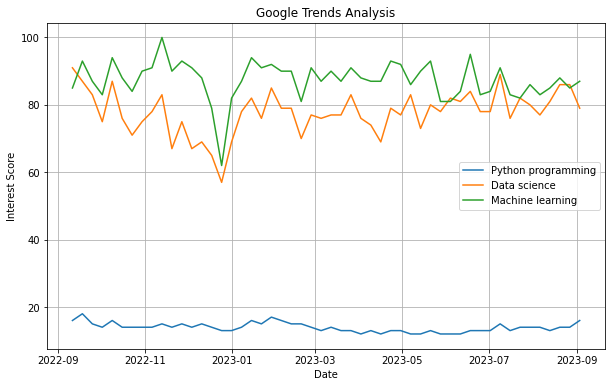

In [5]:
plt.figure(figsize=(10, 6))
for keyword in keywords:
    plt.plot(interest_data.index.values, interest_data[keyword].values, label=keyword)

plt.title('Google Trends Analysis')
plt.xlabel('Date')
plt.ylabel('Interest Score')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
pytrends = TrendReq(hl='it-IT', tz=360, geo='IT')



In [7]:
keywords = ['Pizza', 'Vacanza', 'Mangiare bene']
pytrends.build_payload(keywords, timeframe='today 12-m')


In [8]:
interest_data = pytrends.interest_over_time()


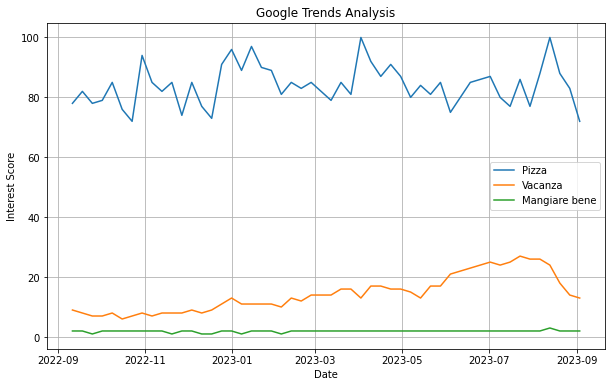

In [9]:
plt.figure(figsize=(10, 6))
for keyword in keywords:
    plt.plot(interest_data.index.values, interest_data[keyword].values, label=keyword)

plt.title('Google Trends Analysis')
plt.xlabel('Date')
plt.ylabel('Interest Score')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
## Google trends and Stock data/ news

In [2]:
from pytrends import dailydata
import yfinance as fin
from datetime import datetime
import numpy as np

In [3]:
fin_data = fin.download('INTC',start="2022-01-01",end= "2023-12-31", interval="1wk")['Close']


[*********************100%***********************]  1 of 1 completed


In [4]:
fin_data=fin_data.to_frame()

In [5]:
fin_data.index = fin_data.index + pd.to_timedelta(1, unit='D')

In [6]:
fin_data

,Close
Date,
2022-01-02,53.439999
2022-01-09,55.700001
2022-01-16,52.040001
2022-01-23,47.730000
2022-01-30,48.009998
...,...
2023-08-06,34.889999
2023-08-13,32.750000
2023-08-20,33.250000


In [7]:

pytrends = TrendReq(hl='en-US', tz=360)
kw_list = ["intel"]
pytrends.build_payload( kw_list, 
                         cat=0, 
                         timeframe='2022-01-01 2023-12-31', 
                         geo='', 
                         gprop=''
                       )

In [8]:
# interest over time
intc = pytrends.interest_over_time()

In [9]:
intc = intc['intel'].to_frame()
intc

,intel
date,
2022-01-02,94
2022-01-09,89
2022-01-16,93
2022-01-23,95
2022-01-30,88
...,...
2023-08-06,75
2023-08-13,78
2023-08-20,75


In [10]:
merge = pd.merge( fin_data ,intc, how='inner', left_index=True, right_index=True)
merge

,Close,intel
Date,,
2022-01-02,53.439999,94
2022-01-09,55.700001,89
2022-01-16,52.040001,93
2022-01-23,47.730000,95
2022-01-30,48.009998,88
...,...,...
2023-08-06,34.889999,75
2023-08-13,32.750000,78
2023-08-20,33.250000,75


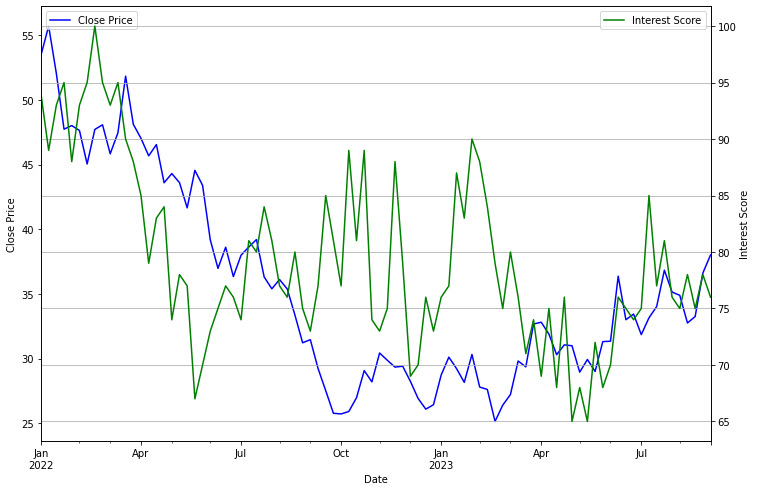

In [27]:

fig, ax1 = plt.subplots(1,1,figsize=(12, 8))
merge.Close.plot(ax=ax1, color='blue', label='Close Price')
ax2 = ax1.twinx()
merge.intel.plot(ax=ax2, color='green', label='Interest Score')
ax1.set_ylabel('Close Price')
ax2.set_ylabel('Interest Score')
ax1.legend(loc=2)
ax2.legend(loc=1)

plt.grid(True)
plt.show()

In [28]:
from numpy import cov
from scipy.stats import pearsonr

In [29]:
data1 = merge.Close
data2 = merge.intel


# calculate covariance matrix
covariance = cov(data1, data2)
print(covariance)

[[60.95185774 31.80030905]
 [31.80030905 62.26541275]]


In [30]:
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.516


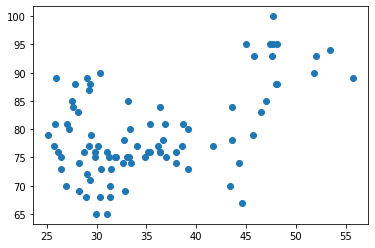

In [32]:
# plot
plt.scatter(data1, data2)
plt.show()

In [ ]:
# Cleary not a significant correlation